<img src="https://simpleicons.org/icons/github.svg" width="30" height="30" /> Github Repo

https://github.com/officialpm/Natural-Language-Processing-in-TensorFlow/

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://github.com/officialpm/Natural-Language-Processing-in-TensorFlow/raw/master/Week%204/Exercise/sonnets.txt \
    -O sonnets.txt
data = open('sonnets.txt').read()

--2020-05-15 09:45:22--  https://github.com/officialpm/Natural-Language-Processing-in-TensorFlow/raw/master/Week%204/Exercise/sonnets.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/officialpm/Natural-Language-Processing-in-TensorFlow/master/Week%204/Exercise/sonnets.txt [following]
--2020-05-15 09:45:22--  https://raw.githubusercontent.com/officialpm/Natural-Language-Processing-in-TensorFlow/master/Week%204/Exercise/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>]  91.38K  --.-KB/s    in 

In [0]:
corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [7]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 5s 10ms/step - loss: 6.8918 - accuracy: 0.0227
Epoch 2/100
484/484 [==============================] - 5s 10ms/step - loss: 6.5033 - accuracy: 0.0226
Epoch 3/100
484/484 [==============================] - 5s 10ms/step - loss: 6.3971 - accuracy: 0.0253
Epoch 4/100
484/484 [==============================] - 5s 10ms/step - loss: 6.2780 - accuracy: 0.0316
Epoch 5/100
484/484 [==============================] - 5s 10ms/step - loss: 6.1753 - accuracy: 0.0358
Epoch 6/100
484/484 [==============================] - 5s 10ms/step - loss: 6.0888 - accuracy: 0.0382
Epoch 7/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9983 - accuracy: 0.0410
Epoch 8/100
484/484 [==============================] - 5s 10ms/step - loss: 5.9026 - accuracy: 0.0481
Epoch 9/100
484/484 [==============================] - 5s 10ms/step - loss: 5.7927 - accuracy: 0.0534
Epoch 10/100
484/484 [==============================] - 5s 10ms/step - loss: 5.682

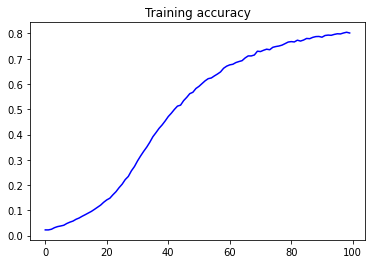

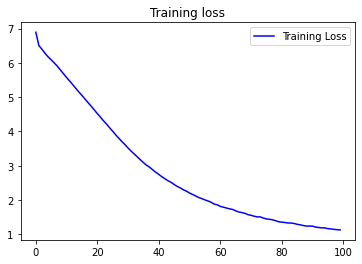

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope will yet my deeds to cross twain twain go guest ill blind place still still say false ' do so art i see find dead grow interest ill ill words look contains young ' aside 'no ' did look we green you look did thought free not free so sort sort tend show thee fair dead lie on her truth doth care care lie to none more spent spent rhyme days prove young prove thee ill kind doth ' ill well contains free twain view prove spend place on thee dead lie on her truth now make so lie to


In [0]:
model.save("W4 Exercise Shakespeare.h5")

In [0]:
#Parth Maniar